In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import sys
sys.path.append('..')
import afml.sampling as sampling

In [3]:
raw_data = pd.read_csv('../data/ESU13.csv')
raw_data['time'] = pd.to_datetime(raw_data['time'], format='%Y-%m-%d %H:%M:%S.%f')
raw_data.head()

,symbol,time,price,volume
0,ESU13,2013-09-01 17:00:00.083,1640.25,8
1,ESU13,2013-09-01 17:00:00.083,1640.25,1
2,ESU13,2013-09-01 17:00:00.083,1640.25,2
3,ESU13,2013-09-01 17:00:00.083,1640.25,1
4,ESU13,2013-09-01 17:00:00.083,1640.25,1


In [4]:
data_time_vwap = sampling.time_bars_sampling(raw_data, '15Min')

In [5]:
num_ticks_per_bar = round(len(raw_data) / data_time_vwap.shape[0], -3)
data_tick_vwap = sampling.tick_bars_sampling(raw_data, num_ticks_per_bar)

In [6]:
vol_per_bar = round(raw_data['volume'].sum() / data_time_vwap.shape[0], -2) # round to the nearest hundred
data_vol_vwap = sampling.volume_bars_sampling(raw_data, vol_per_bar)

In [7]:
dv_per_bar = round((raw_data['volume']*raw_data['price']).sum() / data_time_vwap.shape[0], 0) # round to the nearest hundred
data_dv_vwap = sampling.dollar_bars_sampling(raw_data, dv_per_bar)

In [8]:
time_diff = data_time_vwap['close'].diff()/data_time_vwap['close'].shift(1)
tick_diff = data_tick_vwap['close'].diff()/data_tick_vwap['close'].shift(1)
volume_diff = data_vol_vwap['close'].diff()/data_vol_vwap['close'].shift(1)
dollar_diff = data_dv_vwap['close'].diff()/data_dv_vwap['close'].shift(1)

# Standardize the data
time_standard = (time_diff - time_diff.mean()) / time_diff.std()
tick_standard = (tick_diff - tick_diff.mean()) / tick_diff.std()
volume_standard = (volume_diff - volume_diff.mean()) / volume_diff.std()
dollar_standard = (dollar_diff - dollar_diff.mean()) / dollar_diff.std()

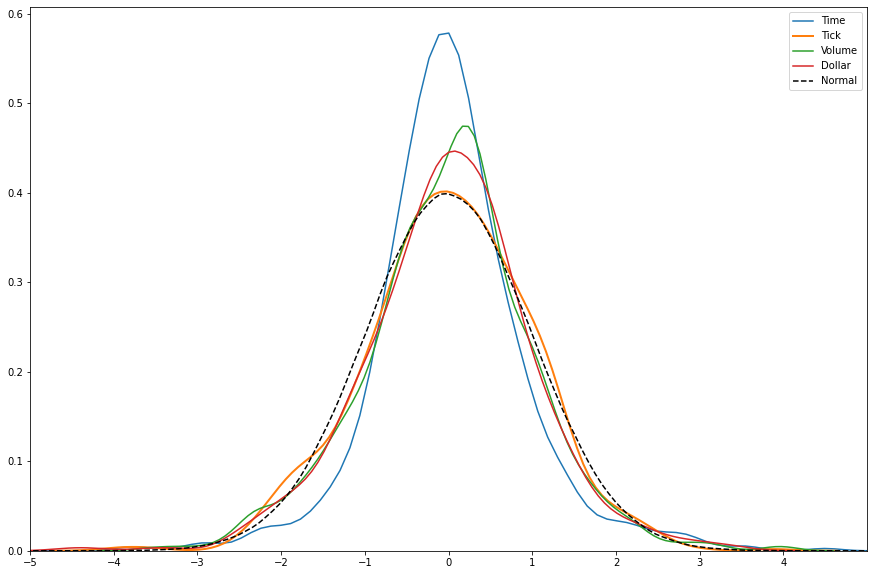

In [9]:
# Plot the Distributions
plt.figure(figsize=(15,10))
sns.kdeplot(time_standard, label="Time")
sns.kdeplot(tick_standard, label="Tick", linewidth=2)
sns.kdeplot(volume_standard, label="Volume")
sns.kdeplot(dollar_standard, label="Dollar")
sns.kdeplot(np.random.normal(size=1000000), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 5))
plt.legend()
plt.xlim(-5, 5)
plt.show()